# Nullmodell

$$ r_{i} (t,\tau) = \log m_{i}(t + \tau) - \log m_{i}(t) = \log \frac{m_{i}(t + \tau)}{m_{i}(t)} $$
$$ R_{ij}^{(exc. 0)}(\tau) = \left \langle r_i(t,\tau) \epsilon_{j} t \right \rangle_t^{(exc. 0)} $$

where

$$ \epsilon_{j}(t) = \text{random number} \in {-1, 1} $$

In [1]:
# Import modules

from matplotlib import pyplot as plt
import numpy as np
import pickle

%matplotlib inline

In [2]:
# Using the only two common stocks in both data sets
ticker_i = 'AAPL'
days = ['07','08','09','10','11']
tau_val = 1000

In [3]:
def nullmodell(ticker_i, day, tau_val, n):
    '''
    Obtain the cross response functions using the midpoint log return of ticker i and random trade signs during
    different time lags. The data is adjusted to use only the values each 1000 ms = 1 s
    
    ticker_i -- String of the abbreviation of the midpoint stock to be analized (i.e. 'AAPL')
    rand -- Rand array of trade signs values
    day -- String of the day to be analized (i.e '07')
    tau_val -- Maximum time lag to be analyzed
    
    return None
    '''
    
    print('Cross response functions data')
    print('Processing data for the stock i ', ticker_i, ' and a random trade sign array the day', day + ' March, 2016')
    
    # Load data
    midpoint_i = pickle.load(open('../Data/midpoint_data/midpoint_201603%s_%s.pickl' % (day,ticker_i), 'rb'))
    time = pickle.load(open('../Data/midpoint_data/time.pickl', 'rb'))
    
    # Setting variables to work with 1s accuracy

    cross_response_tau = np.zeros(tau_val)   # Array of the average of each tau. 10^3 s used by Wang

    midpoint_i_sec = midpoint_i[::1000] # Using values each second
    time_sec = time[::1000] # Changing time from ms to s

    # Calculating the midpoint log return and the cross response functions

    for tau in range(1,tau_val):

        log_return_i_sec = 0. * time_sec # Every second have a log-return
        
        # Obtain the midpoint log return. Displace the numerator tau values to the right and compute the return,
        # and append the remaining values of tau with zeros
        log_return_i_sec = np.append(np.log(midpoint_i_sec[tau:]/midpoint_i_sec[:-tau]),np.zeros(tau))
        
        trade_sign_rand = np.random.rand(23400)
        trade_sign_rand_j = 1 * (trade_sign_rand > 0.5) - 1 * (trade_sign_rand <= 0.5)
            
        cross_response_tau[tau] = np.mean(log_return_i_sec * trade_sign_rand_j)
    
    # Saving data
    
    pickle.dump(cross_response_tau, open('../Data/nullmodell_data_1000ms/null_201603%s_%si_rand_%d.pickl' % (day, ticker_i, n), 'wb'))
    
    print('Nullmodell data saved')
    print()
    
    return None

In [4]:
def nullmodell_plot(days, n):
    
    i = 0
    
    plt.figure(figsize=(9,16))
    plt.subplots_adjust(hspace = 0, wspace = 0)

    for d, day in enumerate(days):
        nullmodella = pickle.load(open('../Data/nullmodell_data_1000ms/null_201603%s_%si_rand_%d.pickl' % (day, ticker_i, 2 * n), 'rb'))
        nullmodellb = pickle.load(open('../Data/nullmodell_data_1000ms/null_201603%s_%si_rand_%d.pickl' % (day, ticker_i, 2*n + 1 ), 'rb'))
        
        i += 1

        plt.subplot(5,2,i)
        plt.semilogx(nullmodella, '-g', label='Stock i %s and random trade sign - %s' % (ticker_i, day))
        plt.xlabel(r'Time lag $[\tau]$')
        plt.ylabel(r'Cross response $ R_{ij} (\tau)_{rand} $')
        plt.legend(loc='best')
        plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        plt.grid(True)
        plt.tight_layout()
        
        i += 1

        plt.subplot(5,2,i)
        plt.semilogx(nullmodellb, '-g', label='Stock i %s and random trade sign - %s' % (ticker_i, day))
        plt.xlabel(r'Time lag $[\tau]$')
        plt.ylabel(r'Cross response $ R_{ij} (\tau)_{rand} $')
        plt.legend(loc='best')
        plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        plt.grid(True)
        plt.tight_layout()

    plt.savefig('../Data/nullmodell_data_1000ms/nullmodell%d.png' % n)

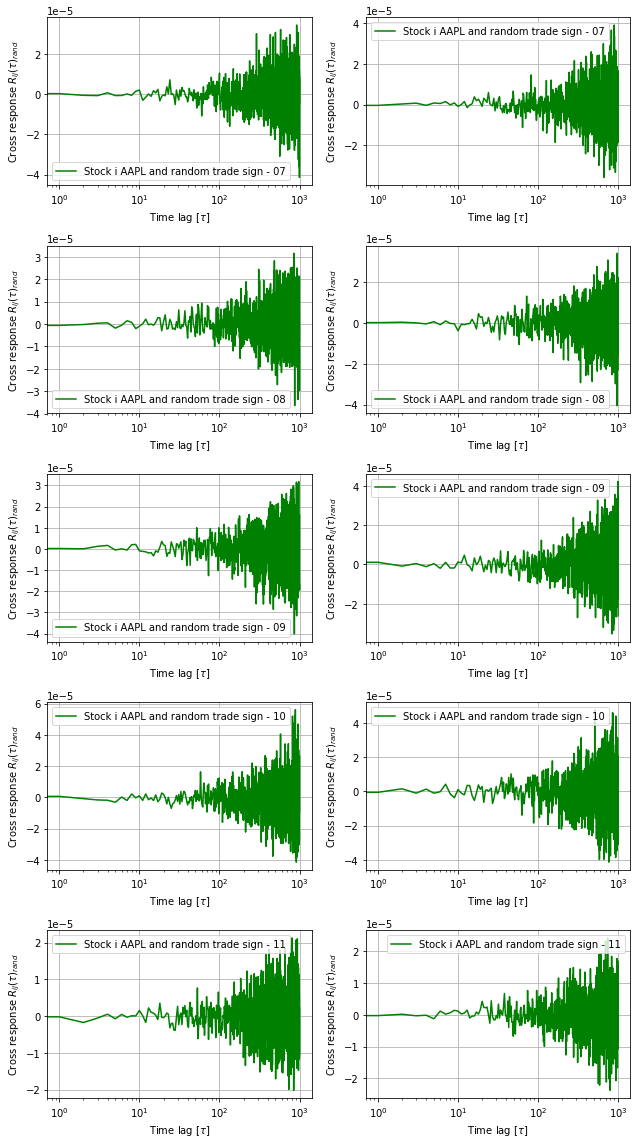

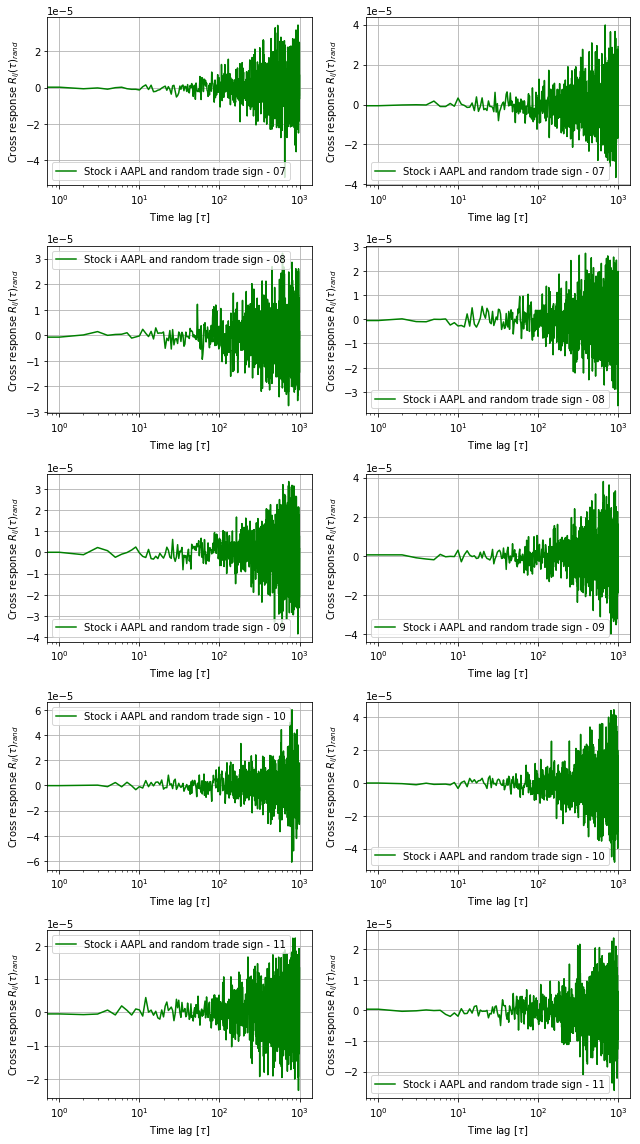

In [7]:
for i in range(4):
    for day in days:
        nullmodell(ticker_i, day, tau_val, i)
for i in range(2):
    nullmodell_plot(days, i)